In [13]:
using DataFramesMeta

include("src/Spectrum.jl")
include("src/ModeSolutions.jl")

view_field (generic function with 2 methods)

In [6]:
lambda = [1540, 1560] # 扫谱波长范围 nm
mode = "TE" # 电磁场模式
R = 20 # WGM 半径
n = 1.5 # 折射率
n_num_max = 20 # 径向阶数

# 扫谱
data = spectrum(lambda, mode, n_num_max, n, R, option="n_num depend");

Finished ✓      100%|███████████████████████████████████| Time: 0:04:40


In [7]:
# 扫谱结果存入文件
CSV.write("/Users/wenzhengliu/Research/temp_data/radius=$R refractive_id=$n wavelength=$lambda'nm' n_max=$n_num_max mode=$mode.csv", data)

"/Users/wenzhengliu/Research/temp_data/radius=20 refractive_id=1.5 wavelength=[1540, 1560]'nm' n_max=2 mode=TE.csv"

In [15]:
lambda_shg = lambda/2 # 倍频光扫谱波长范围 nm
data_shg = spectrum(lambda_shg, mode, n_num_max, n, R, option="all");

Computing...     86%|██████████████████████████████▏    |  ETA: 0:03:15

In [ ]:
# 扫谱结果存入文件
CSV.write("/Users/wenzhengliu/Research/temp_data/radius=$R refractive_id=$n wavelength=$lambda'nm' n_max=$n_num_max mode=$mode.csv", data_shg)

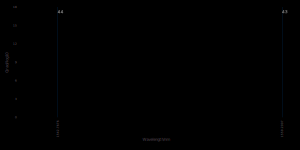

In [7]:
# 显示谱线结果
view_spectrum(lambda, data, 20, view_mode="details")

In [14]:
# 作图，给定模式数
n_num, l_num, m_num = 20, 44, 44

lambda_df = @linq data |> 
            where(:n .== n_num, :l .== l_num) |>
            select(:wav = :wavelength)
lambda_select = lambda_df.wav[1]
println(lambda_select)

n_max = largest_n(lambda_select, n_num, l_num, n, R, mode)

1542.7676211403182


38

Finished ✓      100%|███████████████████████████████████| Time: 0:00:09


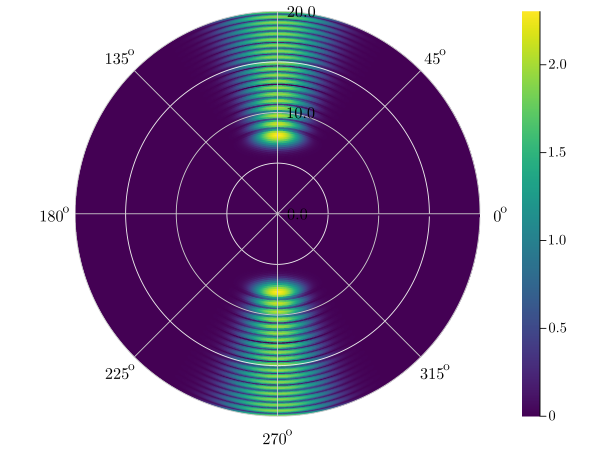

In [15]:
view_field(lambda_select, n_num, l_num, m_num, n_max, n, R, mode, "E", quality="fine", scale="log")